# **Install**

In [ ]:
!pip install pandas matplotlib statsmodels

# **Imports**

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
sm.OLS.from_formula
import statsmodels.formula.api as smf
from datetime import datetime
from matplotlib import pyplot
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

# **Carga de Datos**

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
db = pd.read_csv('/content/drive/MyDrive/powerconsumption.csv')

In [ ]:
drive.mount('/content/drive')
db = pd.read_csv('/content/drive/MyDrive/2023/2C-2023/Análisis Predictivo A./TP2/powerconsumption.csv')

# **Vista de los Datos**

In [ ]:
db.columns

Index(['Datetime', 'Temperature', 'Humidity', 'WindSpeed',
       'GeneralDiffuseFlows', 'DiffuseFlows', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
      dtype='object')

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [ ]:
db.head()

In [ ]:
print(db.dtypes)

# **Missing**

In [ ]:
cantidad_missings = db.isna().sum().sum()
print(cantidad_missings)

In [ ]:
db.isnull().sum()

# **Variables Numericas**

In [ ]:
db.describe(include="object").T

In [ ]:
db['Datetime'] = pd.to_datetime(db['Datetime'], format='%m/%d/%Y %H:%M')
db['Fecha'] = db['Datetime'].dt.date
db['Fecha'] = pd.to_datetime(db['Fecha'])
db['Hora'] = db['Datetime'].dt.time
db['Hora'] = pd.to_datetime(db['Hora'], format='%H:%M:%S')

In [ ]:
db = db.drop('Datetime', axis=1)

# **Zona 1**

In [ ]:
dbgb = db.groupby('Fecha')['PowerConsumption_Zone1'].sum().reset_index()
dbgb = dbgb.set_index('Fecha')
y = dbgb['PowerConsumption_Zone1'].resample('MS').mean().to_frame()

In [ ]:
b = dbgb['PowerConsumption_Zone1'].resample('D').mean().to_frame()

<Figure size 1600x1000 with 0 Axes>

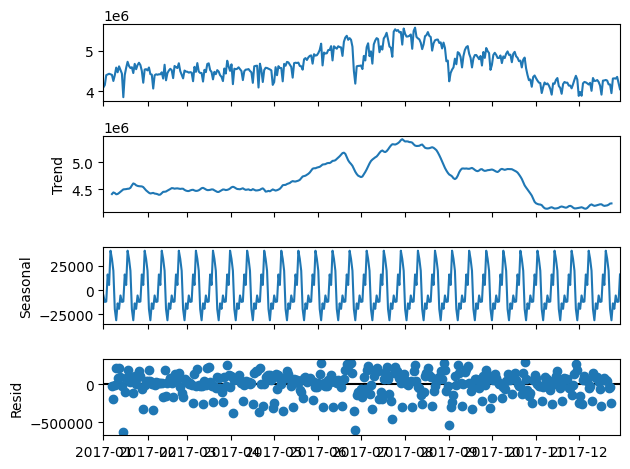

In [ ]:
plt.figure(figsize=(16, 10))
decomposition = sm.tsa.seasonal_decompose(b, model='additive', period=12)
decomposition.plot()
plt.show()

In [ ]:
db.head(5)

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Hora
Fecha,,,,,,,,,
2017-01-01,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,1900-01-01 00:00:00
2017-01-01,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,1900-01-01 00:10:00
2017-01-01,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,1900-01-01 00:20:00
2017-01-01,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,1900-01-01 00:30:00
2017-01-01,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,1900-01-01 00:40:00


<ipython-input-29-7e1003d00955>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  db_daily = db.resample('MS').mean()


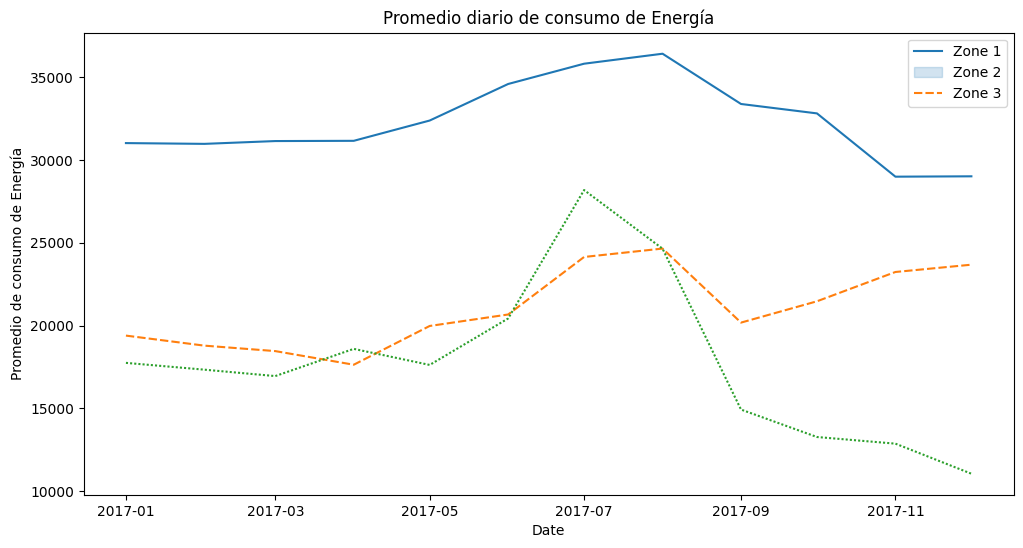

In [ ]:
#Promedio diario de Consumición de Energía
db.set_index('Fecha', inplace=True)
db_daily = db.resample('MS').mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=db_daily[['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']])
plt.xlabel('Date')
plt.ylabel('Promedio de consumo de Energía')
plt.title('Promedio diario de consumo de Energía')
plt.legend(labels=['Zone 1', 'Zone 2', 'Zone 3'])
plt.show()

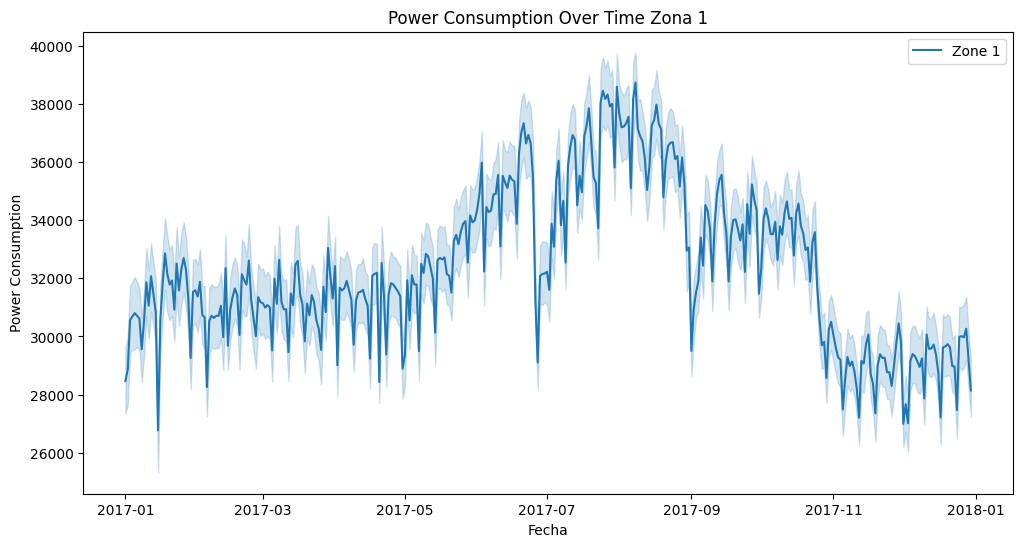

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Fecha', y='PowerConsumption_Zone1', data=db, label='Zone 1')
plt.xlabel('Fecha')
plt.ylabel('Power Consumption')
plt.title('Power Consumption Over Time Zona 1')
plt.show()

# **Matriz de Correlación**

In [ ]:
matriz = db[['Temperature', 'Humidity', 'WindSpeed', 'PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# **Modelos Predictivos**

In [ ]:
def RMSE(predicted, actual):
    mse = (predicted - actual) ** 2
    rmse = np.sqrt(mse.sum() / mse.count())
    return rmse

In [ ]:
dbgb.plot()
pyplot.show()

## **ACF Y PACF**

In [ ]:
dataframe_PCZone1 = dbgb['PowerConsumption_Zone1'].resample('MS').mean().to_frame()

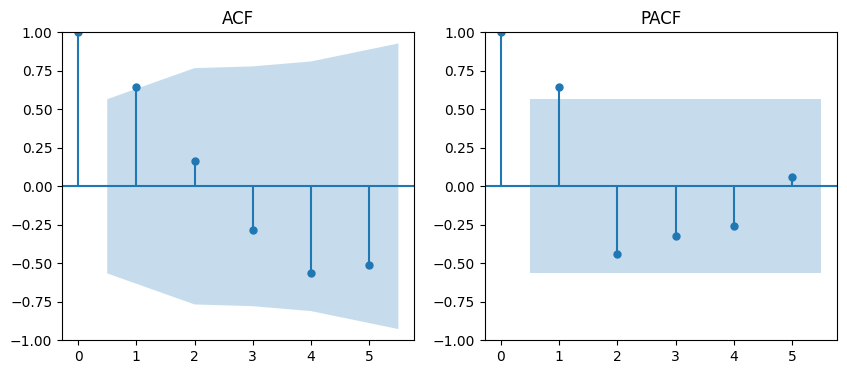

In [ ]:
fig, axes = plt.subplots(1, 2,figsize=(10,4))
num_lags = len(dataframe_PCZone1) // 2
smt.graphics.plot_acf(dataframe_PCZone1, lags=num_lags-1,ax=axes[0],title='ACF')
smt.graphics.plot_pacf(dataframe_PCZone1, lags=num_lags-1,ax=axes[1],title='PACF')
plt.show()

## Test de Dickey-Fuller aumentado

In [ ]:
result = adfuller(dataframe_PCZone1);
print('ADF Statistic: %f' % result[0]); print('p-value: %f' % result[1])
for key, value in  result[4].items():
    print('Valor crítico %s: %.2f' % (key,value))

ADF Statistic: -2.255370
p-value: 0.186766
Valor crítico 1%: -4.67
Valor crítico 5%: -3.37
Valor crítico 10%: -2.80


Diferenciada

In [ ]:
result = adfuller(dataframe_PCZone1.diff()[1:]); print('ADF Statistic: %f' % result[0]);
print('p-value: %f' % result[1])
for key, value in  result[4].items():
    print('Valor crítico %s: %.2f' % (key,value))

ADF Statistic: -1.595352
p-value: 0.485928
Valor crítico 1%: -4.67
Valor crítico 5%: -3.37
Valor crítico 10%: -2.80


## **ARIMA**

In [ ]:
model_ARIMA = ARIMA(dataframe_PCZone1, order=(1,1,0))
results_ARIMA = model_ARIMA.fit()

predicted=5160469.595069, expected=5246667.298700
predicted=5247090.403280, expected=4809122.123886
predicted=4807820.846393, expected=4727183.047925
predicted=4726796.941359, expected=4176303.384623
predicted=4172485.876565, expected=4179480.253482
Test RMSE: 319011.219


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


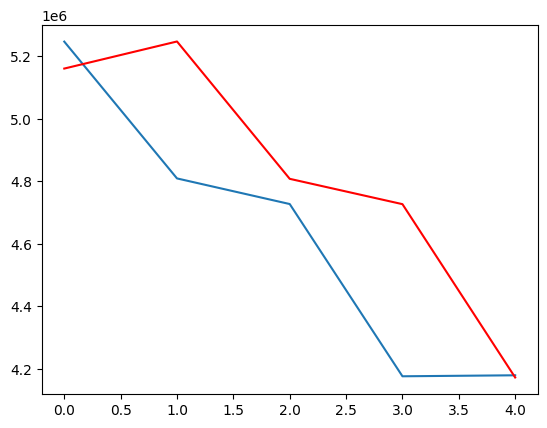

In [ ]:
X = dataframe_PCZone1.values
size = int(len(X) * 0.66)
train, train = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(history, order=(1,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

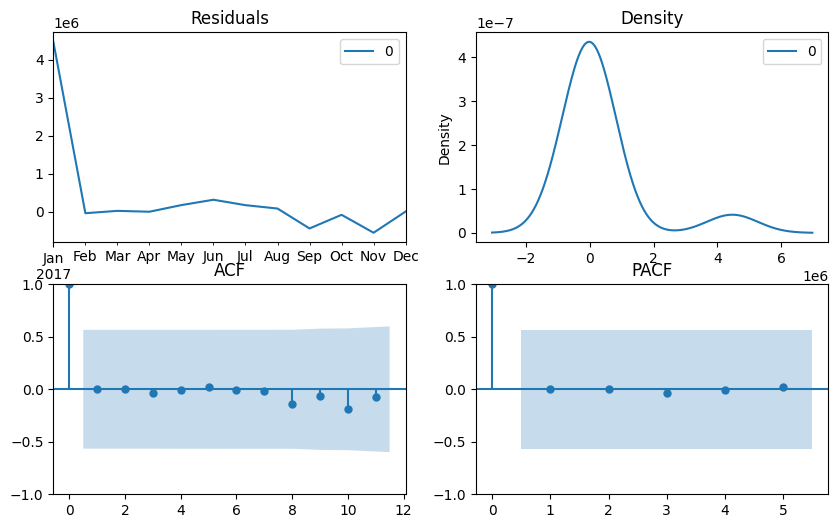

In [ ]:
residuals = pd.DataFrame(results_ARIMA.resid)
fig, axes = plt.subplots(2, 2,figsize=(10,6))
num_lags = len(residuals) - 1
num_lags_pacf = min(11, num_lags // 2)
residuals.plot(title="Residuals", ax=axes[0,0]);
residuals.plot(kind='kde', title='Density', ax=axes[0,1])
smt.graphics.plot_acf(residuals, lags=num_lags,ax=axes[1,0],title='ACF');
smt.graphics.plot_pacf(residuals, lags=num_lags_pacf,ax=axes[1,1],title='PACF')
plt.show()

In [ ]:
df_Results = pd.DataFrame(columns = ["Model", "RMSE"])

In [ ]:
df_Results.loc[0, "Model"] = "ARIMA"
df_Results.loc[0, "RMSE"] = rmse
df_Results.head()

,Model,RMSE
0,ARIMA,319011.219152


In [ ]:
print(results_ARIMA.summary())

                                 SARIMAX Results                                  
Dep. Variable:     PowerConsumption_Zone1   No. Observations:                   12
Model:                     ARIMA(1, 1, 0)   Log Likelihood                -152.211
Date:                    Thu, 30 Nov 2023   AIC                            308.422
Time:                            11:41:05   BIC                            309.218
Sample:                        01-01-2017   HQIC                           307.920
                             - 12-01-2017                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0067      0.322      0.021      0.983      -0.625       0.639
sigma2      6.309e+10    9.2e-13   6.86e+22      0.000    6.31e+10    6.31e+10
Ljung-Box (L1) (Q): 

## **Tendencia cudrática**

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

In [ ]:
dataframe_PCZone1["timeIndex"] = pd.Series(np.arange(len(dataframe_PCZone1['PowerConsumption_Zone1'])), index=dataframe_PCZone1.index)
dataframe_PCZone1.timeIndex.head(3)

Fecha
2017-01-01    0
2017-02-01    1
2017-03-01    2
Freq: MS, Name: timeIndex, dtype: int64

In [ ]:
dataframe_PCZone1["timeIndex_sq"] = dataframe_PCZone1["timeIndex"]**2

In [ ]:
df_train, df_test = train_test_split(dataframe_PCZone1, test_size=2,  random_state=42, shuffle=False)

In [ ]:
train, val = train_test_split(df_train,test_size=2,  random_state=42, shuffle=False)

In [ ]:
model_quadratic = smf.ols('PowerConsumption_Zone1 ~ timeIndex + timeIndex_sq', data = train).fit()

In [ ]:
train["QuadraticTrend"] = model_quadratic.predict(train[["timeIndex","timeIndex_sq"]])
val["QuadraticTrend"] = model_quadratic.predict(val[["timeIndex","timeIndex_sq"]])

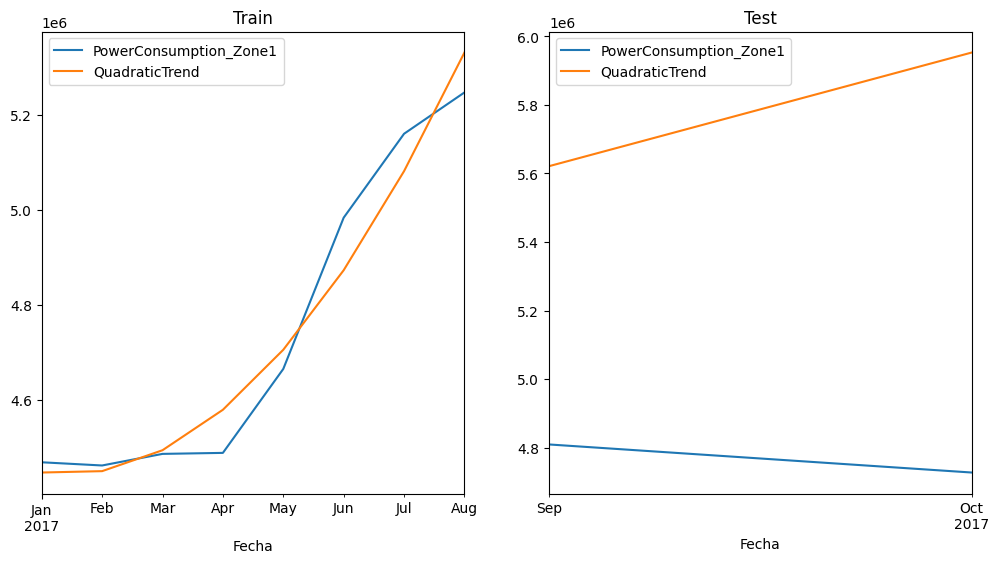

In [ ]:
fig, axes = plt.subplots(1, 2,figsize=(12,6))
train.plot(kind = "line", y = ["PowerConsumption_Zone1","QuadraticTrend"],ax=axes[0],title='Train');
val.plot(kind = "line", y = ["PowerConsumption_Zone1","QuadraticTrend"],ax=axes[1],title='Test');
plt.show()

In [ ]:
model_RMSE = RMSE(val.QuadraticTrend, val.PowerConsumption_Zone1)

In [ ]:
df_Results = pd.DataFrame(columns = ["Model", "RMSE"])

In [ ]:
df_Results.loc[1, "Model"] = "QuadraticTrend"
df_Results.loc[1, "RMSE"] = model_RMSE
df_Results.head()

,Model,RMSE
0,ARIMA,319011.219152
1,QuadraticTrend,1039796.64643


##Tendencia con transformacion logaritmica

In [ ]:
df_train, df_test = train_test_split(dataframe_PCZone1, test_size=2,  random_state=42, shuffle=False)

In [ ]:
X = df_train.drop(["PowerConsumption_Zone1"], axis=1)
y = df_train["PowerConsumption_Zone1"]

In [ ]:
df_train2, X_val2 = train_test_split(df_train,test_size=2,  random_state=42, shuffle=False)

In [ ]:
df_train2['log_PowerConsumption_Zone1'] = np.log(df_train2['PowerConsumption_Zone1'])
X_val2['log_PowerConsumption_Zone1'] = np.log(X_val2['PowerConsumption_Zone1'])

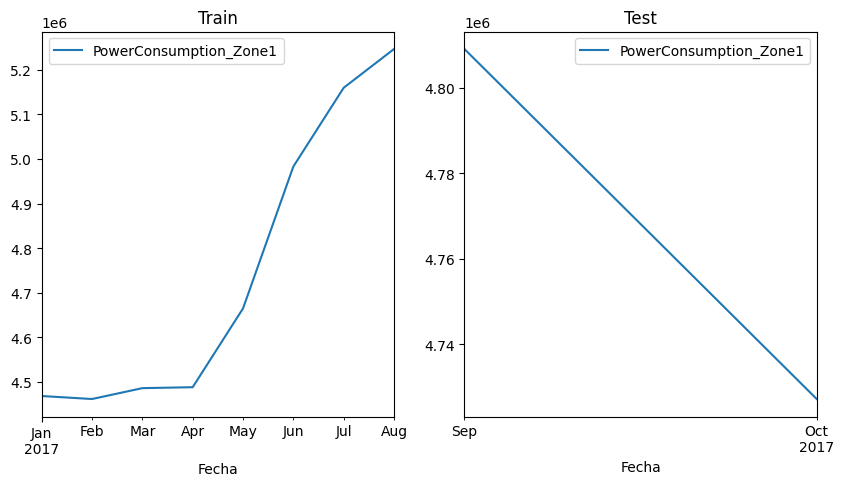

In [ ]:
fig, axes = plt.subplots(1, 2,figsize=(10,5))
df_train2.plot(kind = "line", y = ["PowerConsumption_Zone1"],ax=axes[0],title='Train');
X_val2.plot(kind = "line", y = ["PowerConsumption_Zone1"],ax=axes[1],title='Test');
plt.show()

In [ ]:
model_log = smf.ols('log_PowerConsumption_Zone1 ~ timeIndex ', data = df_train2).fit()

In [ ]:
df_train2["LogTrend"] = model_log.predict(df_train2[["timeIndex"]])
X_val2["LogTrend"] = model_log.predict(X_val2[["timeIndex"]])

In [ ]:
df_train2['back_LogTrend'] = np.exp(df_train2['LogTrend'])
X_val2['back_LogTrend'] = np.exp(X_val2['LogTrend'])

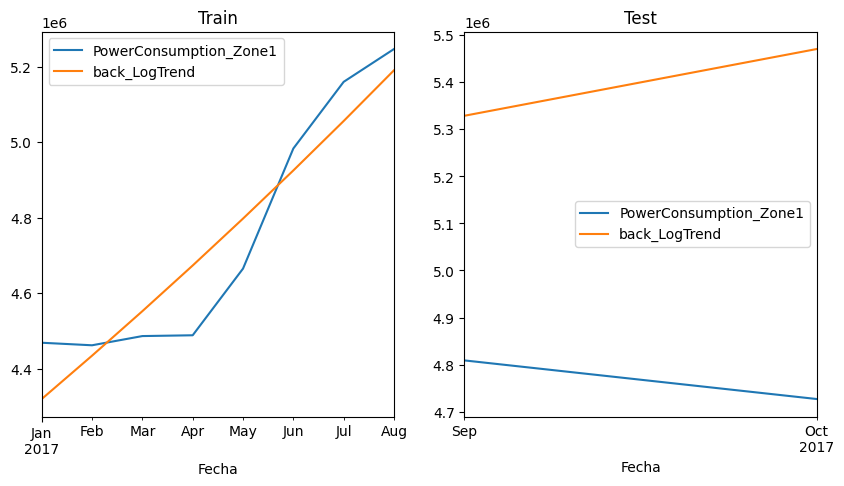

In [ ]:
fig, axes = plt.subplots(1, 2,figsize=(10,5))
df_train2.plot(kind = "line", y = ["PowerConsumption_Zone1","back_LogTrend"],ax=axes[0],title='Train');
X_val2.plot(kind = "line", y = ["PowerConsumption_Zone1","back_LogTrend"],ax=axes[1],title='Test');
plt.show()

In [ ]:
model_RMSE = RMSE(X_val2.back_LogTrend, X_val2.PowerConsumption_Zone1)

In [ ]:
df_Results.loc[2, "Model"] = "back_LogTrend"
df_Results.loc[2, "RMSE"] = model_RMSE
df_Results.head()

,Model,RMSE
0,ARIMA,319011.219152
1,QuadraticTrend,1039796.64643
2,back_LogTrend,640825.247954
